# **Part I: Clinical metadata analysis**

Your task in Part I is to explore the patients' metadata, learn to code with standard Python libraries, and get familiar with the Colab environment. The clinical data provides information about each patient’s demographics (age and sex) and each patient’s cognitive scores (MMSE and CDR). 

In [73]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics

In [75]:
# Set plotting style
%matplotlib inline
sns.set_theme()

In [76]:
# Load the clinical data
oasisDF = pd.read_csv('../OASIS_data.csv')

If the above command does not work, you can mount your Google Drive manually. Go to "Files" icon on the left of your notebook, and click on "Mount Drive" icon at the top to mount your Google Drive in the runtime's virtual machine. You need to upload the OASIS_data.csv file for Part 1 of the assignment. Scroll through your Google Drive in drop-down menu to the left of your notebook. In order to get the path to OASIS_data.csv, click on the three dots to the right of the file name and select "Copy path".

#### Question 1

In [82]:
oasisDF.head(10)

,sex,age,CDR,MMS,diagnosis
0,F,26,NaN,30.0,CN
1,M,35,NaN,30.0,CN
2,F,66,0.0,29.0,CN
3,M,78,1.0,23.0,AD
4,F,54,NaN,30.0,CN
5,M,21,NaN,30.0,CN
6,M,59,0.0,29.0,CN
7,M,81,0.0,28.0,CN
8,M,22,NaN,30.0,CN
9,M,48,NaN,30.0,CN


In [78]:
maxCDR = oasisDF['CDR'].max()
cnCount = oasisDF['CDR'].value_counts()[0]
adCount = oasisDF['CDR'].value_counts()[1]
sadCount = oasisDF['CDR'].value_counts()[2]
print("No AD: "+str(cnCount)+"  |  "+"Mild AD: "+str(adCount)+"  |  "+"Severe AD: "+str(sadCount))
print("With total: "+str(oasisDF["CDR"].size))

No AD: 124  |  Mild AD: 26  |  Severe AD: 2
With total: 377


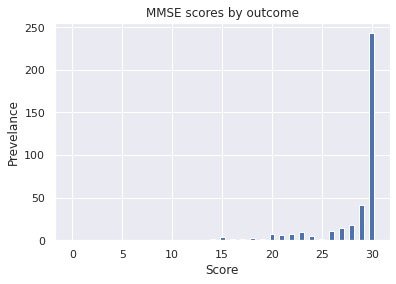

In [79]:
mmsScores = np.zeros(31)
for i in range(0,377):
    val = int(oasisDF.iloc[i, 3])
    mmsScores[val] += 1

#ax = plt.barplot(x=mmsIndex, y=mmsScores)
ax = plt.bar(mmsIndex,mmsScores,.5)
plt.title("MMSE scores by outcome")
plt.xlabel("Score")
plt.ylabel("Prevelance")
plt.savefig("../graphics/MMSEscores")

In [83]:
OASIS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        377 non-null    object 
 1   age        377 non-null    int64  
 2   CDR        197 non-null    float64
 3   MMS        377 non-null    float64
 4   diagnosis  377 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 14.9+ KB


In [81]:
OASIS_df.describe()

,age,CDR,MMS
count,377.000000,197.000000,377.000000
mean,50.456233,0.266497,28.363395
std,25.050137,0.399355,3.262951
min,18.000000,0.000000,14.000000
25%,23.000000,0.000000,29.000000
50%,50.000000,0.000000,30.000000
75%,73.000000,0.500000,30.000000
max,96.000000,2.000000,30.000000


In [55]:
# Question 1.1 
# Use the .isnull() Pandas method to identify which feature is affected by missing values
# Use the .fillna() Pandas method to impute the missing values appropriately

nan


In [85]:
for i in range(0,len(oasisDF.CDR)):
    if pd.isnull(oasisDF.CDR[i]):
        oasisDF.CDR = oasisDF.CDR.fillna(0)
oasisDF.head(10)

,sex,age,CDR,MMS,diagnosis
0,F,26,0.0,30.0,CN
1,M,35,0.0,30.0,CN
2,F,66,0.0,29.0,CN
3,M,78,1.0,23.0,AD
4,F,54,0.0,30.0,CN
5,M,21,0.0,30.0,CN
6,M,59,0.0,29.0,CN
7,M,81,0.0,28.0,CN
8,M,22,0.0,30.0,CN
9,M,48,0.0,30.0,CN


In [ ]:
# Question 1.2
# Use an approach similar to the one bellow to compare the number of diseased and healthy patients 
# Here we are comparing the number of female and male patients: there are many more females than males (imbalance)
num_female = len(OASIS_df[OASIS_df['sex'] == 'F'])
num_male = len(OASIS_df[OASIS_df['sex'] == 'M'])
print('Number of females: ' + str(num_female))
print('Number of males: ' + str(num_male))

Number of females: 235
Number of males: 142


In [ ]:
# Question 1.3 
# Use the histplot seaborn plotting function to study the distribution of the feature "age"

#### Question 2

In [ ]:
# Split data into predictive features and class labels (diagnosis)
X = OASIS_df.drop(columns=['diagnosis'], inplace=False)
y = OASIS_df['diagnosis']

In [ ]:
# Numeric encoding of categorical feature
# The "sex" information is no longer a string but an integer: 1 for male, 0 for female
encoder = LabelEncoder()
encoder.fit(['F','M'])
X['sex'] = encoder.transform(X['sex'])

In [ ]:
# Visualize dataset
X.head()

,sex,age,CDR,MMS
0,0,26,NaN,30.0
1,1,35,NaN,30.0
2,0,66,0.0,29.0
3,1,78,1.0,23.0
4,0,54,NaN,30.0


In [ ]:
# Clustering with k-means
# Use the KMeans function from Sklearn to cluster X. The result of the clustering, which is a mapping of each patient to 
# one cluster, is referred to as the "labels" attribute in the Sklearn documentation. 

In [ ]:
# Use a scatterplot plotting function from Seaborn (or any other type of figure) to study the output of the clustering and 
# answer the questions. 

#### Question 3

In [ ]:
# Label encoding of the classification target: Alzheimer's disease is labeled 1 and cognitively normal is labeled 0. 
# Alzheimer's disease (AD) is called the positive class because it is the class of interest. 
encoder = LabelEncoder()
encoder.fit(['CN','AD'])
y = encoder.transform(y)
y[y==0] = 2
y[y==1] = 0
y[y==2] = 1

In [ ]:
# Split X and y into a training set (75%) and a testing set (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# Scale features (data matrix columns) to have a mean of zero and a standard deviation of one
# Scaling is necessary when features are measured in different units and have different ranges
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Instantiate a logistic regression model with L2 regularization
logreg_model = LogisticRegression(penalty='l2', random_state=0)

In [ ]:
# Fit the logistic regression model using the labeled training data
logreg_model.fit(X_train, y_train)

In [ ]:
# Evaluate the model's predictive performance using the testing data
y_pred = logreg_model.predict(X_test)
print('Accuracy on testing set: ' + str(100*len(y_test == y_pred)/100) + '%')

# Confusion matrix on the testing set
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
true_negatives, false_positives, false_negatives, true_positives = confusion_matrix.ravel()
print(confusion_matrix)

In [ ]:
# Inspect the logisitc regression model coefficients 
coef_sex = np.round(logreg_model.coef_[0][0], 3)
coef_age = np.round(logreg_model.coef_[0][1], 3)
coef_CDR = np.round(logreg_model.coef_[0][2], 3)
coef_MMS = np.round(logreg_model.coef_[0][3], 3)
print('Coefficient of sex: ' + str(coef_sex))
print('Coefficient of age: ' + str(coef_age))
print('Coefficient of CDR: ' + str(coef_CDR))
print('Coefficient of MMS: ' + str(coef_MMS))